In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from functions import loadDataFrame

In [124]:
# df1 = loadDataFrame('Carl/eksperiment4.csv')
# df1 = df1.iloc[:10,:]
# display(df1)

# correctsArray = np.array([])
# inputsArray = np.array([])

# for idx,row in df1.iterrows():
#     correctsArray = np.concatenate((correctsArray,row['correctSequence']),axis=0)
#     inputsArray = np.concatenate((inputsArray,row['userInput']),axis=0)

# correctsArray , inputsArray

### Baseline

In [125]:
#PEAK kodeskrivning følger her:
names = [
    'Carl',
         'Erik',
         'Ali',
         'Kasper'
           ]

grids = []
gridTitles = ['Baseline', 'spatial-motor suppression', 'articulatory suppression']
fileNameArrays = [['eksperiment4.csv','eksperiment3.csv'], ['eksperiment5_finger.csv'], ['eksperiment5_lalala.csv']]


for fileNameArray in fileNameArrays:
    correctsArray = np.array([])
    inputsArray = np.array([])
    for fileName in fileNameArray:
        for name in names:
            df2 = loadDataFrame(name+'/'+fileName)
            # display(df2)
            for idx,row in df2.iterrows():
                if len(row['correctSequence'])>8 or len(row['userInput'])<8:
                    continue
                correctsArray = np.concatenate((correctsArray,row['correctSequence']),axis=0)
                inputsArray = np.concatenate((inputsArray,row['userInput']),axis=0)

    correctIndexArray = [(lambda x: ord(x)-65)(x) for x in correctsArray]
    inputIndexArray = [(lambda x: ord(x)-65)(x) for x in inputsArray]

    grid = np.zeros((26,26))
    for elem1, elem2 in zip(correctIndexArray, inputIndexArray):
        # if elem1 != elem2:
        #     print(elem1,elem2)
        if (elem2<0) or (elem2>25):
            continue
        grid[elem1][elem2] += 1
    grid = np.around(np.sqrt(grid),decimals=1)

    # grid = (grid - grid.min()) / (grid.max() - grid.min())

    grids.append(grid)


In [126]:
len(grids)

3

In [127]:

# correctsArray = np.array([])
# inputsArray = np.array([])



# for name in names:
#     df2 = loadDataFrame(name+'/eksperiment5_finger.csv')
#     # display(df2)
#     for idx,row in df2.iterrows():
#         correctsArray = np.concatenate((correctsArray,row['correctSequence']),axis=0)
#         inputsArray = np.concatenate((inputsArray,row['userInput']),axis=0)

# correctIndexArray = [(lambda x: ord(x)-65)(x) for x in correctsArray]
# inputIndexArray = [(lambda x: ord(x)-65)(x) for x in inputsArray]

# grid = np.zeros((26,26))
# for elem1, elem2 in zip(correctIndexArray, inputIndexArray):
#     # if elem1 != elem2:
#     #     print(elem1,elem2)
#     if (elem2<0) or (elem2>25):
#         continue
#     grid[elem1][elem2] += 1
# grid = np.around(np.sqrt(grid),decimals=1)
# # grid = (grid - grid.min()) / (grid.max() - grid.min())

# grids.append(grid)


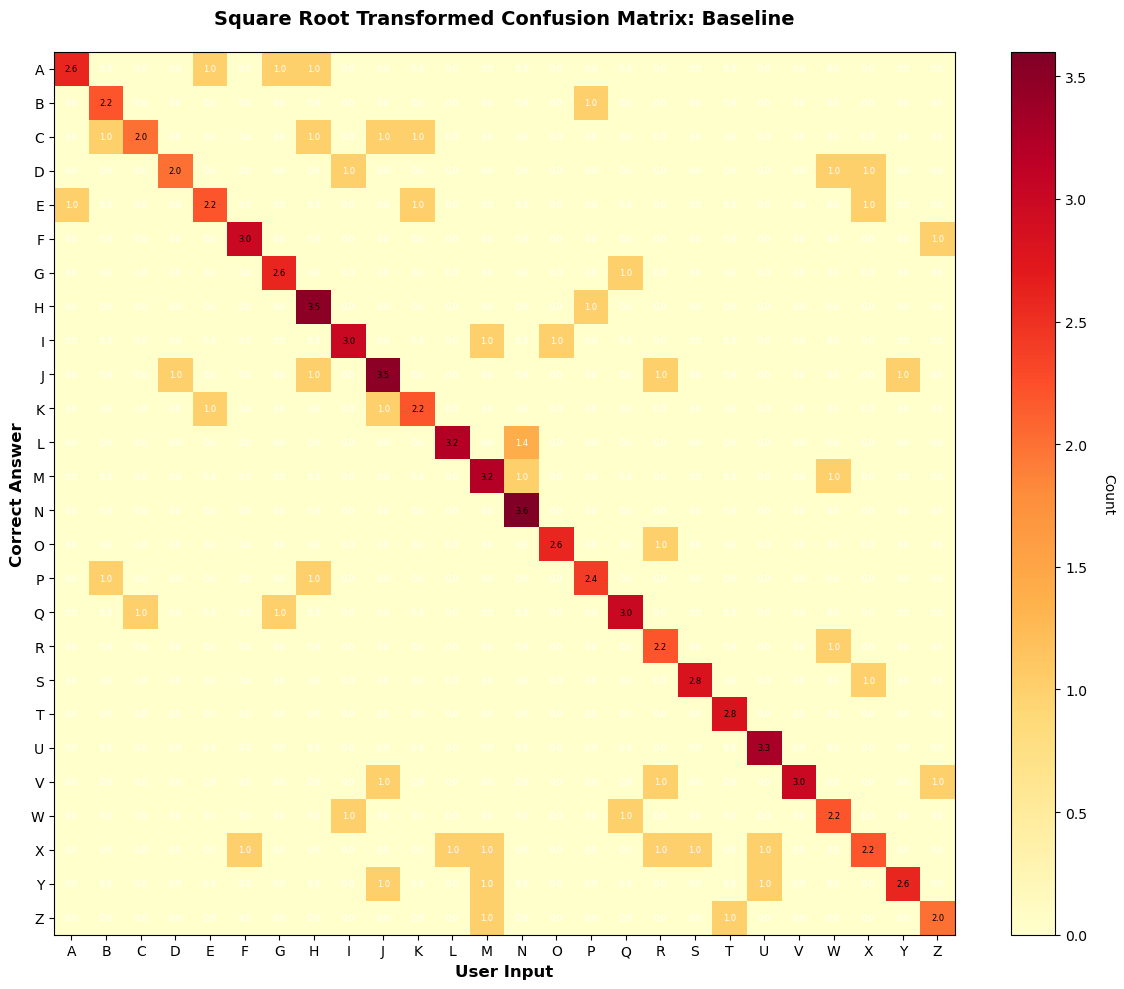

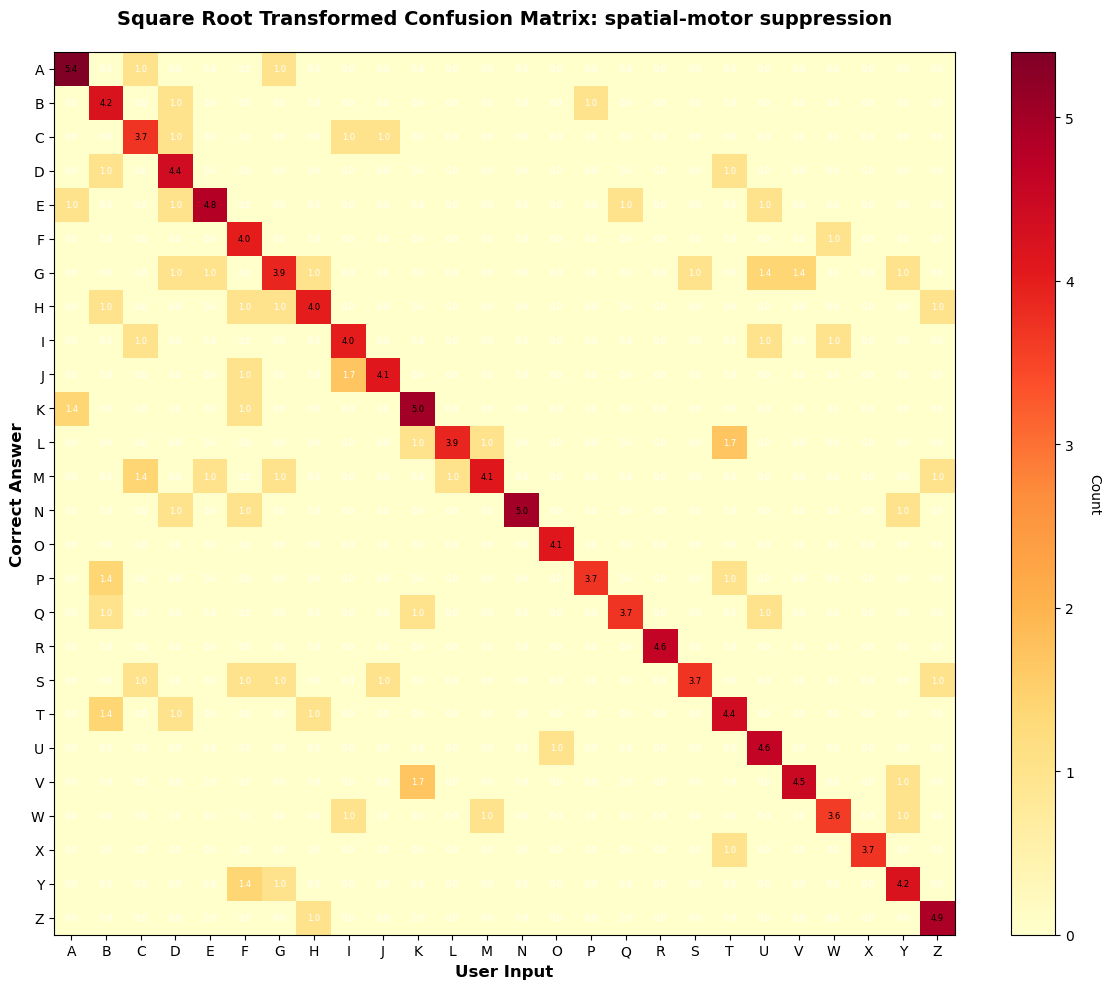

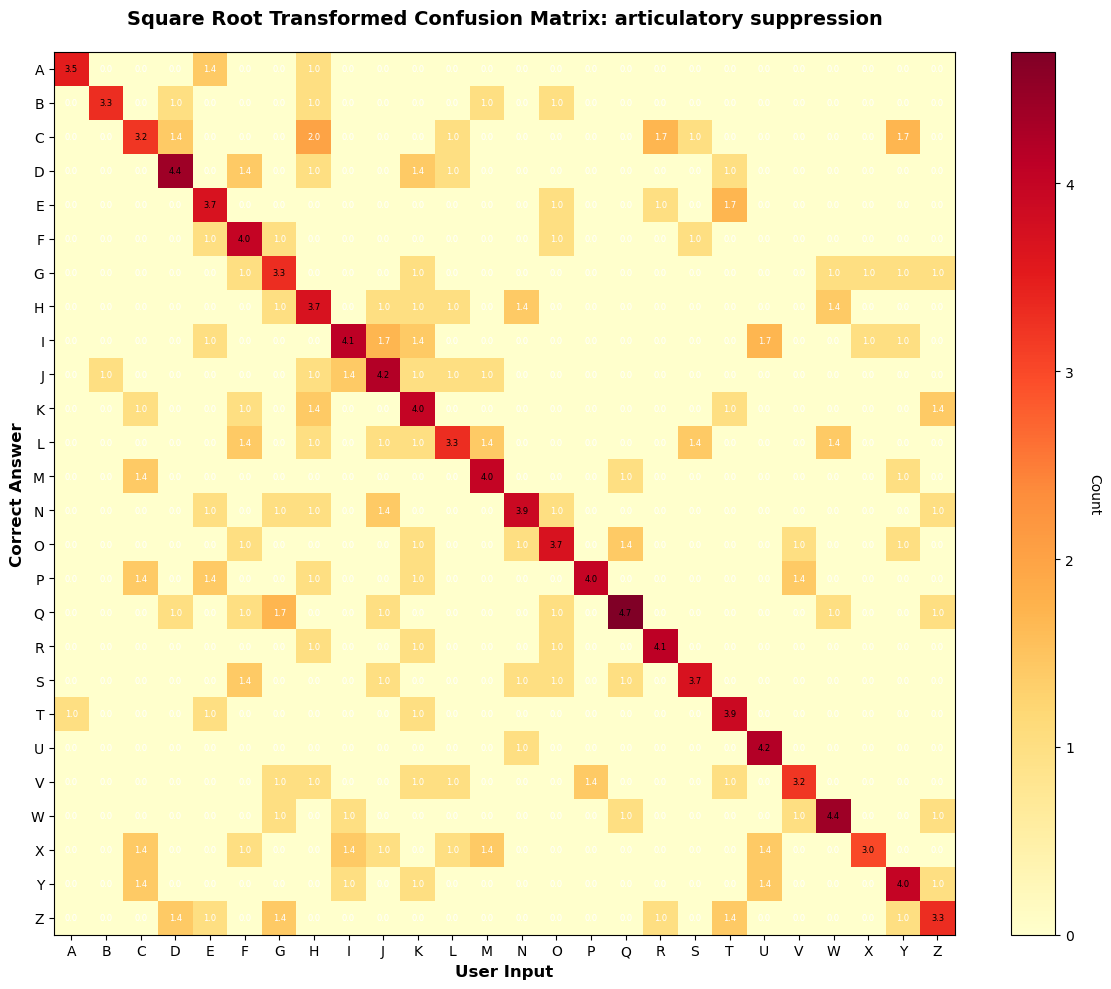

In [128]:
# Create alphabet labels
for i,grid in enumerate(grids):
    labels = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

    # Create the heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(grid, cmap='YlOrRd', aspect='auto')

    # Set ticks and labels
    ax.set_xticks(np.arange(26))
    ax.set_yticks(np.arange(26))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    # Add labels
    ax.set_xlabel('User Input', fontsize=12, fontweight='bold')
    ax.set_ylabel('Correct Answer', fontsize=12, fontweight='bold')
    ax.set_title('Square Root Transformed Confusion Matrix: '+gridTitles[i], fontsize=14, fontweight='bold', pad=20)

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Count', rotation=270, labelpad=20)

    # Add text annotations showing the values
    for i in range(26):
        for j in range(26):
            text = ax.text(j, i, grid[i, j],
                        ha="center", va="center", color="black" if grid[i, j] > grid.max()/2 else "white",
                        fontsize=6)

    plt.tight_layout()
    plt.show()